<a href="https://colab.research.google.com/github/Kunal-code-u/InfoBharatDataScienceInternship/blob/main/InfoBharatDataScienceInternship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install pandas numpy matplotlib seaborn openpyxl scikit-learn


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Load Excel file
df = pd.read_excel("Online Retail.xlsx")

In [44]:
df.head()
df.info()
df.describe()     # Summary statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


Step1: Data Cleaning

1.1 Check for Missing Values

In [45]:
# Check for missing values in each column
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [46]:
# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

 1.2 Remove Duplicates

In [47]:
# Check and remove duplicate rows
df.duplicated().sum()
df = df.drop_duplicates()


1.3 Remove Outliers

In [48]:
# Keep only rows with positive quantity and price
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]


 1.4 Fix Data Types

In [49]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

<ipython-input-49-1f26bb90d392>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [50]:
# View cleaned data info
df.info()

# View sample of cleaned data
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Step 2: Data Transformation

 2.1 Create a TotalPrice Column

In [51]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

<ipython-input-51-18878337d6d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [52]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


🔹 2.2 Extract Date Features from InvoiceDate

In [53]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour


In [54]:
df[['InvoiceDate', 'Year', 'Month', 'DayOfWeek', 'Hour']].head()

,InvoiceDate,Year,Month,DayOfWeek,Hour
0,2010-12-01 08:26:00,2010,12,Wednesday,8
1,2010-12-01 08:26:00,2010,12,Wednesday,8
2,2010-12-01 08:26:00,2010,12,Wednesday,8
3,2010-12-01 08:26:00,2010,12,Wednesday,8
4,2010-12-01 08:26:00,2010,12,Wednesday,8


Step 3: Exploratory Data Analysis (EDA)

3.1 Summary Statistics

In [55]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,Year,Month,Hour
count,392692.000000,392692,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914,15287.843865,22.631500,2010.934631,7.601871,12.721532
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000,2010.000000,1.000000,6.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000,4.950000,2011.000000,5.000000,11.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000,12.450000,2011.000000,8.000000,13.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000,19.800000,2011.000000,11.000000,14.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000,2011.000000,12.000000,20.000000
std,180.492832,NaN,22.241836,1713.539549,311.099224,0.247177,3.415015,2.276661


🔹 3.2 Top 10 Most Popular Products by Quantity Sold

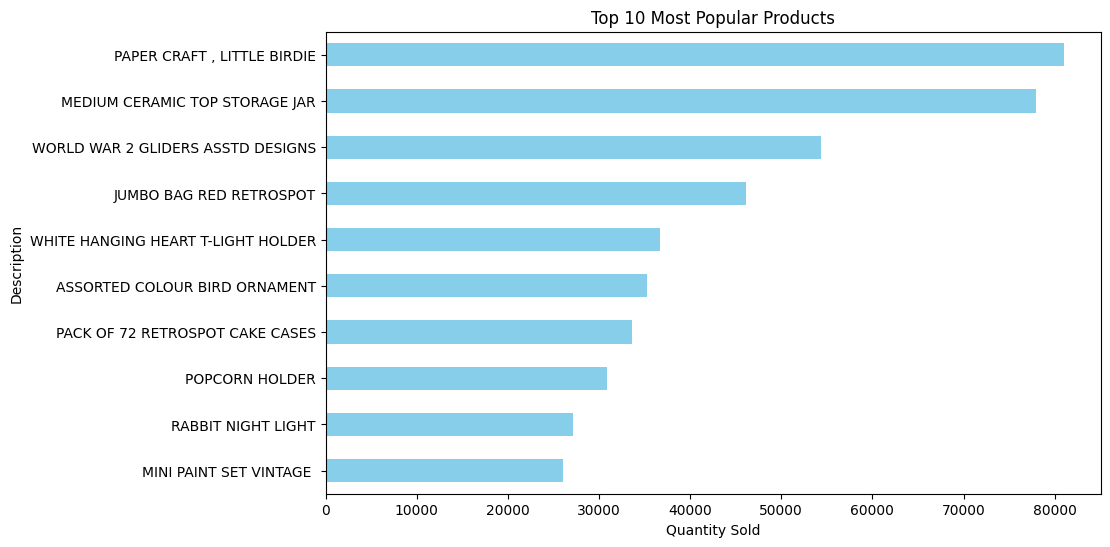

In [56]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Bar chart
plt.figure(figsize=(10, 6))
top_products.plot(kind='barh', color='skyblue')
plt.xlabel('Quantity Sold')
plt.title('Top 10 Most Popular Products')
plt.gca().invert_yaxis()
plt.show()

3.3 Sales Trend Over Time (Monthly)


<ipython-input-57-d9abdf90316c>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['TotalPrice'].resample('M').sum()


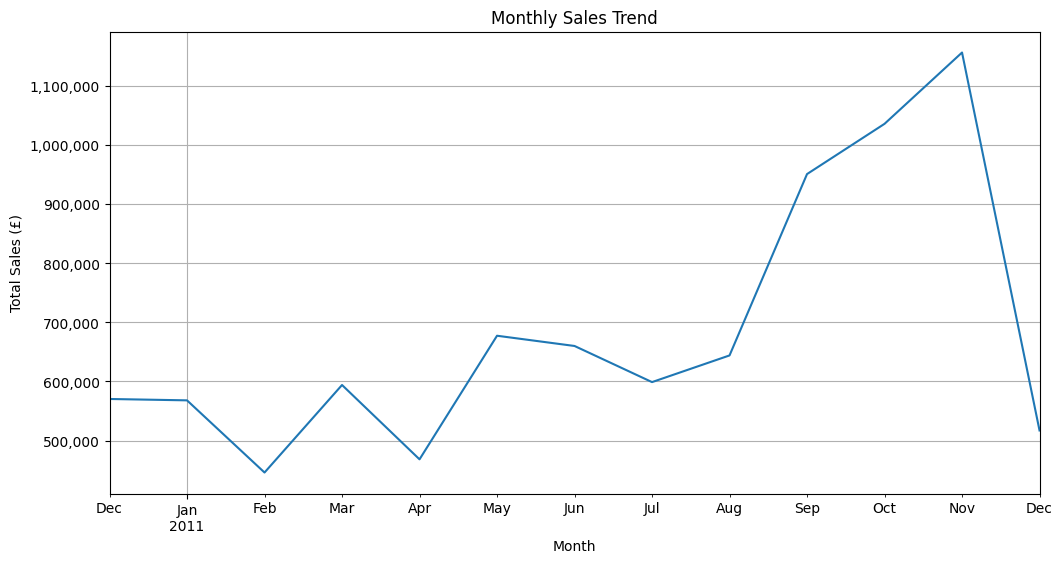

In [57]:
# Set invoice date as index
df.set_index('InvoiceDate', inplace=True)

# Resample by month and sum TotalPrice
monthly_sales = df['TotalPrice'].resample('M').sum()

import matplotlib.ticker as ticker

# Plot
plt.figure(figsize=(12, 6))
monthly_sales.plot()

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (£)')  # Assuming UK currency
plt.grid(True)

# Format Y-axis with commas
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()



In [58]:
df.reset_index(inplace=True)


In [59]:
df.head()

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,DayOfWeek,Hour
0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,2010,12,Wednesday,8
1,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34,2010,12,Wednesday,8
2,2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,2010,12,Wednesday,8
3,2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34,2010,12,Wednesday,8
4,2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,2010,12,Wednesday,8


3.4 Distribution of Customer Spending (Histogram)

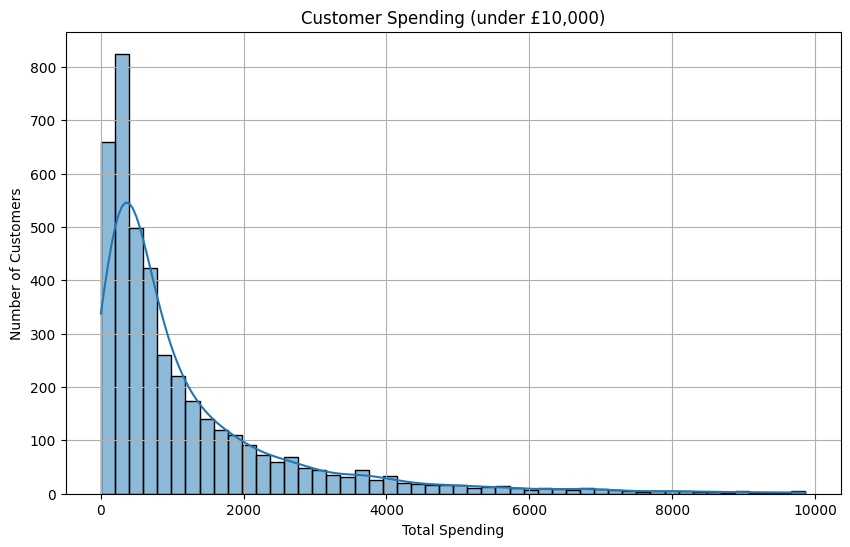

In [61]:
customer_spending = df.groupby('CustomerID')['TotalPrice'].sum()

plt.figure(figsize=(10,6))
sns.histplot(customer_spending[customer_spending < 10000], bins=50, kde=True)
plt.title("Customer Spending (under £10,000)")
plt.xlabel("Total Spending")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.show()

3.5 Correlation Matrix

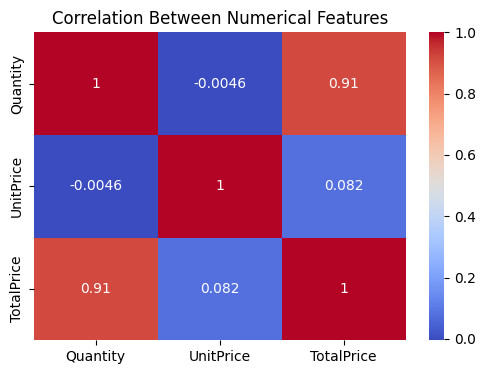

In [63]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Quantity', 'UnitPrice', 'TotalPrice']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()

3.6 Pie Chart for Customer Demographics

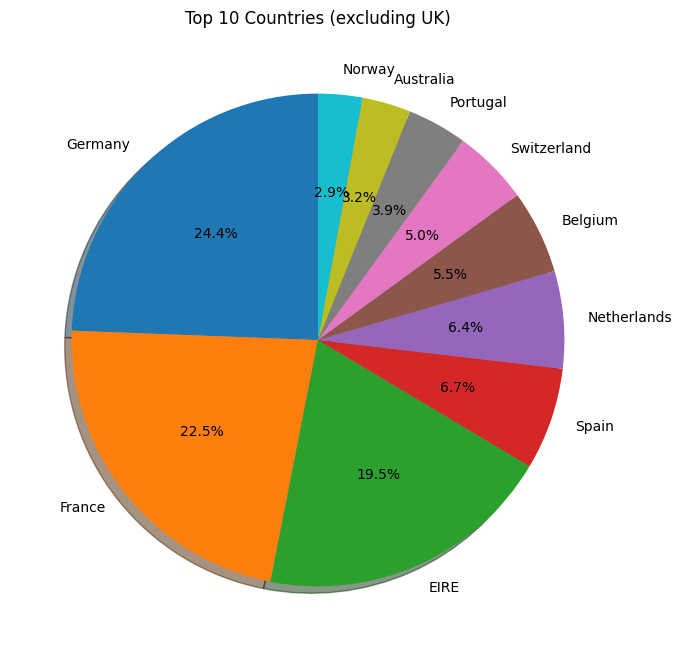

In [64]:
# Count of customers by country
top_countries = df[df['Country'] != 'United Kingdom']['Country'].value_counts().head(10)

# Pie chart
plt.figure(figsize=(8, 8))
top_countries.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Top 10 Countries (excluding UK)')
plt.ylabel('')  # Remove y-label
plt.show()


Step 4: Customer Segmentation (Using K-Means)

4.1 Create the RFM Table

In [65]:
# Reference date = latest invoice date
latest_date = df['InvoiceDate'].max()

# RFM metrics for each customer
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                 # Frequency
    'TotalPrice': 'sum'                                     # Monetary
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm.reset_index()
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


4.2 Normalize the RFM Data

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

4.3 Use the Elbow Method to Find the Optimal Number of Clusters (k)

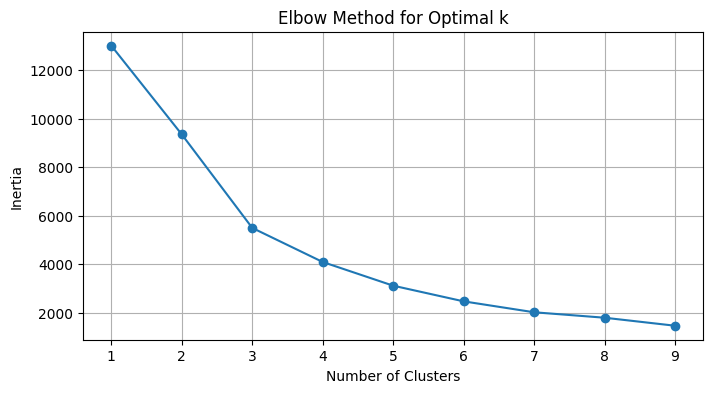

In [68]:
from sklearn.cluster import KMeans

inertia = []
K = range(1, 10)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(rfm_scaled)
    inertia.append(model.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


4.4 Apply K-Means Clustering

In [69]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


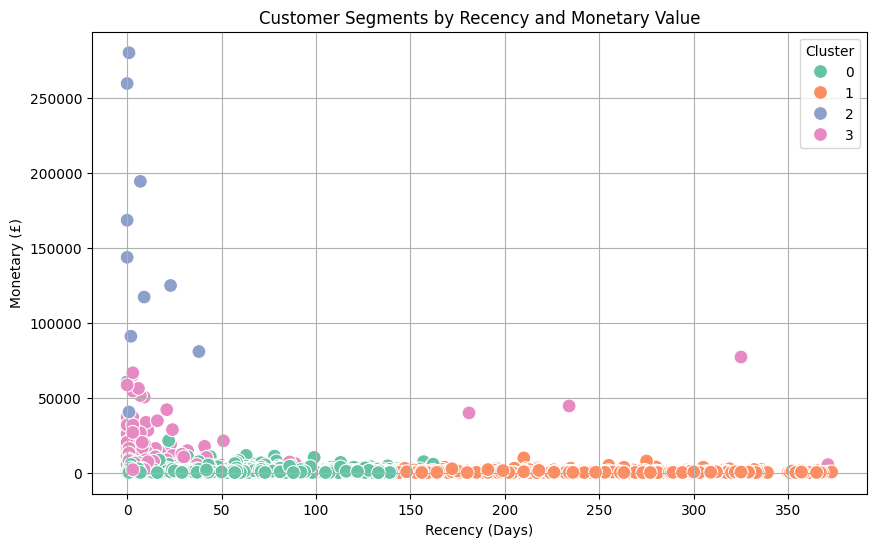

In [70]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments by Recency and Monetary Value')
plt.xlabel('Recency (Days)')
plt.ylabel('Monetary (£)')
plt.grid(True)
plt.show()


Step 5: Customer Lifetime Value (CLV) Estimation

In [71]:
# Recency: lower is better, so reverse the scoring
rfm['R_Score'] = pd.qcut(rfm['Recency'], q=4, labels=[4, 3, 2, 1]).astype(int)

# Frequency & Monetary: higher is better
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=4, labels=[1, 2, 3, 4]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=4, labels=[1, 2, 3, 4]).astype(int)


In [72]:
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)


<ipython-input-73-01af56b4f01b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='RFM_Score', order=rfm['RFM_Score'].value_counts().index[:15], palette='coolwarm')


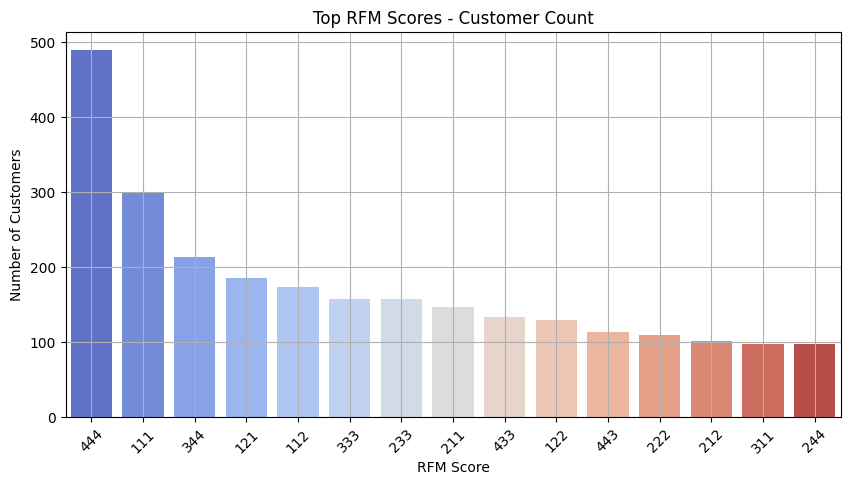

In [73]:
plt.figure(figsize=(10, 5))
sns.countplot(data=rfm, x='RFM_Score', order=rfm['RFM_Score'].value_counts().index[:15], palette='coolwarm')
plt.title('Top RFM Scores - Customer Count')
plt.xlabel('RFM Score')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Step 6: Predictive Modelling

In [75]:
# Create target: 1 if Recency <= 60 days, else 0
rfm['Purchased_Again'] = (rfm['Recency'] <= 60).astype(int)
rfm[['Recency', 'Frequency', 'Monetary', 'Purchased_Again']].head()


,Recency,Frequency,Monetary,Purchased_Again
0,325,1,77183.60,0
1,1,7,4310.00,1
2,74,4,1797.24,0
3,18,1,1757.55,1
4,309,1,334.40,0


In [76]:
from sklearn.model_selection import train_test_split

X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Purchased_Again']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      1.00      1.00       465

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868



In [78]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      1.00      1.00       465

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868



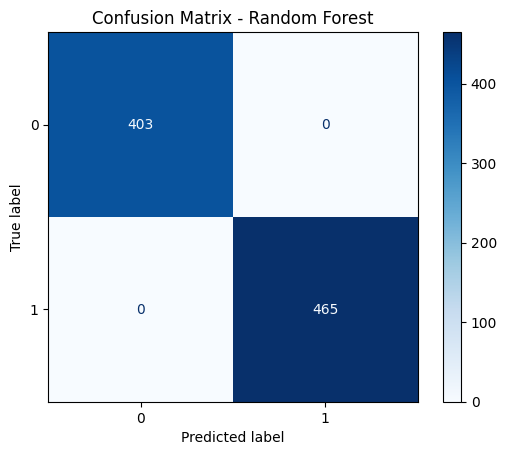

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.grid(False)
plt.show()
